In [108]:
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"]=10,5
text_size = 20
plt.rc('xtick', labelsize=text_size) 
plt.rc('ytick', labelsize=text_size) 
line_width = 2.5
plt.style.use('ggplot')
sns.set_palette("twilight")

In [135]:
def read_xvg(file):
    with open(file, 'r') as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            try:
                x1 = float(line.split()[0])
                y1 = float(line.split()[1])
                x.append(x1)
                y.append(y1)
            except ValueError:
                pass
    return x, y

def get_df(to_read):
    # define locations of files
    k_310_2 =  '/Users/IggyMac/OneDrive - UvA/2020-2021/Biomolecular simulations/Project/Work/Biomolecular-Simulations/310K/2'
    k_310_1 = '/Users/IggyMac/OneDrive - UvA/2020-2021/Biomolecular simulations/Project/Work/Biomolecular-Simulations/310K/1'
    k_400 = '/Users/IggyMac/OneDrive - UvA/2020-2021/Biomolecular simulations/Project/Work/Biomolecular-Simulations/400K'
    # read data
    os.chdir(k_310_1)
    x_310_1, y_310_1 = read_xvg(to_read)

    os.chdir(k_310_2)
    x_310_2, y_310_2 = read_xvg(to_read)

    os.chdir(k_400)
    x_400, y_400 = read_xvg(to_read)
    # create data frame and melt
    df_dict = {"x": x_310_1,
          "310K - 1" : y_310_1,
          "310K - 2" : y_310_2,
          "400K" : y_400}

    df = pd.DataFrame(df_dict)
    df = pd.melt(df, id_vars=['x'], value_vars=['310K - 1', '310K - 2', '400K'])
    df.columns = ['Time', 'Simulation', 'value']
    return df

def plot_joint(data, text_size = 15, xlabel = "Time", ylabel = "RMS"):
    plt.rc('xtick', labelsize=text_size) 
    plt.rc('ytick', labelsize=text_size) 

    f, axs = plt.subplots(1,2,
                      figsize=(10,5),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,0.5]))

    sns.lineplot(data = df,
                x = "Time",
                y = "value",
                hue = "Simulation",
                ax = axs[0])


    sns.kdeplot(data = df,
                y = "value",
                hue = "Simulation",
                legend = False,
                ax = axs[1])
    axs[0].set_xlabel(xlabel, size = text_size) 
    axs[0].set_ylabel(ylabel, size = text_size)
    axs[1].set_xlabel("", size = text_size) 
    axs[1].axes.get_xaxis().set_visible(False)
    axs[0].legend(title = "Simulation", fontsize=text_size, title_fontsize=text_size)

    f.tight_layout()

# RMS

## RMS - whole protein

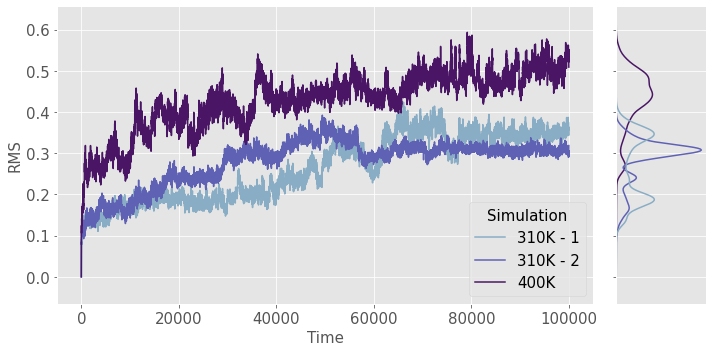

In [136]:
to_read = "rms.xvg"
df = get_df(to_read)
plot_joint(df, text_size = 15)

## RMS - between A and rest

## RMS - between A terminus